In [32]:
import numpy as np 
import pandas as pd 
from keras.models import Sequential 
from keras.layers import Dropout
from keras.layers.core import Dense, Activation 
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from time import time
import matplotlib.pyplot as plt 
%matplotlib inline

In [33]:
df = pd.read_csv('motoads_kaggle_v01_final_clean_classify_ver2.csv')

In [34]:
df.head(3)

,maker-model,car_age,mileage,has_vin,fuel_type,gearbox_is_automat,gearbox_is_manual,transmission_fwd,transmission_rwd,transmission_awd,...,has_tv_tuner,n_features,seller_type_is_from_dealer,seller_type_is_from_private,price_level1,price_level2,price_level3,price_level4,price_level5,price_level6
0,Fiat 124,48,10,0,Benzyna,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,Honda Jazz,8,110000,1,Benzyna,0,1,1,0,0,...,0,9,0,1,0,0,0,1,0,0
2,BMW Seria 3,17,261000,0,Benzyna,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [35]:
df.shape

(96582, 102)

In [36]:
df_new = pd.get_dummies(df)

In [37]:
df_new.head(3)

,car_age,mileage,has_vin,gearbox_is_automat,gearbox_is_manual,transmission_fwd,transmission_rwd,transmission_awd,is_from_poland,is_from_abroad,...,color_Br?zowy,color_Czarny,color_Czerwony,color_Fioletowy,color_Inny kolor,color_Niebieski,color_Srebrny,color_Szary,color_Z?oty,color_Zielony
0,48,10,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,8,110000,1,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,17,261000,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [38]:
df_new.isnull().sum().sum()

0

In [39]:
df_need_standardize = pd.DataFrame()
df_need_standardize['car_age'] = df_new['car_age']
df_need_standardize['mileage'] = df_new['mileage']
df_need_standardize['n_params_available'] = df_new['n_params_available']
df_need_standardize['n_features'] = df_new['n_features']

In [40]:
mu = df_need_standardize.mean()
sd = df_need_standardize.std()
df_need_standardize = (df_need_standardize-mu)/sd
df_need_standardize.describe()

,car_age,mileage,n_params_available,n_features
count,9.658200e+04,9.658200e+04,9.658200e+04,9.658200e+04
mean,2.667738e-15,-6.075253e-16,5.757388e-14,3.373690e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.465190e+00,-1.396429e+00,-4.855912e+00,-2.116008e+00
25%,-7.776144e-01,-6.345147e-01,-8.466455e-01,-6.820017e-01
50%,8.185527e-02,1.136810e-01,2.988593e-01,-4.466556e-02
75%,5.975370e-01,5.647558e-01,8.716117e-01,6.723375e-01
max,1.417716e+01,9.666328e+01,4.880878e+00,3.460683e+00


In [41]:
df_need_standardize.isnull().sum().sum()

0

In [42]:
df_new['car_age'] = df_need_standardize['car_age']
df_new['mileage'] = df_need_standardize['mileage']
df_new['n_params_available'] = df_need_standardize['n_params_available']
df_new['n_features'] = df_need_standardize['n_features']

In [43]:
df_train = df_new.sample(frac = 0.8, random_state = 0)
df_test = df_new.drop(df_train.index)
df_train.head(3)
print("training set size: ", df_train.shape)
print("testing set size: ", df_test.shape)

training set size:  (77266, 1111)
testing set size:  (19316, 1111)


In [44]:
train_results = pd.DataFrame()
train_results['price_level1'] = df_train['price_level1']
train_results['price_level2'] = df_train['price_level2']
train_results['price_level3'] = df_train['price_level3']
train_results['price_level4'] = df_train['price_level4']
train_results['price_level5'] = df_train['price_level5']
train_results['price_level6'] = df_train['price_level6']

In [45]:
train_data = df_train.drop('price_level1',axis = 1).drop('price_level2',axis = 1).drop('price_level3',axis = 1).drop('price_level4',axis = 1).drop('price_level5',axis = 1).drop('price_level6',axis = 1)

In [46]:
X_train = train_data.values
P_train = train_results.values

In [47]:
test_results = pd.DataFrame()
test_results['price_level1'] = df_test['price_level1']
test_results['price_level2'] = df_test['price_level2']
test_results['price_level3'] = df_test['price_level3']
test_results['price_level4'] = df_test['price_level4']
test_results['price_level5'] = df_test['price_level5']
test_results['price_level6'] = df_test['price_level6']

In [48]:
test_data = df_test.drop('price_level1',axis = 1).drop('price_level2',axis = 1).drop('price_level3',axis = 1).drop('price_level4',axis = 1).drop('price_level5',axis = 1).drop('price_level6',axis = 1)

In [49]:
X_test = test_data.values
P_test = test_results.values

In [50]:
print("X_train size",X_train.shape)
print("P_train size",P_train.shape)

X_train size (77266, 1105)
P_train size (77266, 6)


In [51]:
df_small_train = df_new.sample(frac = 0.01)
X_small_train = df_small_train.drop('price_level1',axis = 1).drop('price_level2',axis = 1).drop('price_level3',axis = 1).drop('price_level4',axis = 1).drop('price_level5',axis = 1).drop('price_level6',axis = 1).values
small_test_results = pd.DataFrame()
small_test_results['price_level1'] = df_small_train['price_level1']
small_test_results['price_level2'] = df_small_train['price_level2']
small_test_results['price_level3'] = df_small_train['price_level3']
small_test_results['price_level4'] = df_small_train['price_level4']
small_test_results['price_level5'] = df_small_train['price_level5']
small_test_results['price_level6'] = df_small_train['price_level6']
P_small_train = small_test_results.values

In [52]:
# Way of classify
# level = 1
# number = 96582/6
# # number = 16097
# # divide at sorted index 16096,32193,48290,64387,80484,96581
# count = 0
# newList = np.sort(df_new['price_value_pln_brutto'].values)
# for i in range(7):
#     print(i*96582-1)
# print(newList[16096])
# level1_up = newList[16096]
# print(newList[32193])
# level2_up = newList[32193]
# print(newList[48290])
# level3_up = newList[48290]
# print(newList[64387])
# level4_up = newList[64387]
# print(newList[80484])
# level5_up = newList[80484]
# print(newList[96581])
# level6_up = newList[96581]

KeyError: 'price_value_pln_brutto'

In [22]:
epoch = 100
patience = 3

In [23]:
model = Sequential()
model.add(Dense(2000,input_shape=(1105,)))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Dense(6))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])
hist = model.fit(X_train,P_train,epochs=epoch,validation_split = 0.2,batch_size=100,verbose=1,callbacks=[EarlyStopping(patience=patience)])

Train on 61812 samples, validate on 15454 samples
Epoch 1/100
61812/61812 [==============================] - 70s 1ms/step - loss: 0.6902 - acc: 0.7189 - val_loss: 0.5064 - val_acc: 0.7940
Epoch 2/100
61812/61812 [==============================] - 67s 1ms/step - loss: 0.5348 - acc: 0.7853 - val_loss: 0.4822 - val_acc: 0.7996
Epoch 3/100
61812/61812 [==============================] - 61s 981us/step - loss: 0.4917 - acc: 0.8044 - val_loss: 0.4809 - val_acc: 0.8049
Epoch 4/100
61812/61812 [==============================] - 62s 1ms/step - loss: 0.4553 - acc: 0.8201 - val_loss: 0.4724 - val_acc: 0.8085
Epoch 5/100
61812/61812 [==============================] - 67s 1ms/step - loss: 0.4175 - acc: 0.8370 - val_loss: 0.4655 - val_acc: 0.8138
Epoch 6/100
61812/61812 [==============================] - 68s 1ms/step - loss: 0.3872 - acc: 0.8483 - val_loss: 0.5198 - val_acc: 0.8064
Epoch 7/100
61812/61812 [==============================] - 66s 1ms/step - loss: 0.3517 - acc: 0.8619 - val_loss: 0.5573 

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2000)              2212000   
_________________________________________________________________
activation_1 (Activation)    (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
activation_2 (Activation)    (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               125250    
__________


minimum validation loss index 4 of 100
cross-entropy
 training = 0.41745394749204945
 validation = 0.46551727125079106
accuracy rate
 training = 0.8370381149822613
 validation = 0.8137698954546669
 baseline = 0.16666666666666666


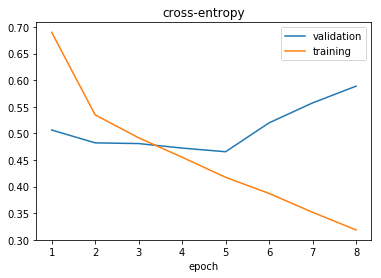

In [25]:
results = pd.DataFrame() 
results['epoch'] = hist.epoch 
results['epoch'] = results['epoch'] + 1 
results['training loss'] = hist.history['loss'] 
results['validation loss'] = hist.history['val_loss'] 
results['training acc'] = hist.history['acc'] 
results['validation acc'] = hist.history['val_acc'] 
results['validation']=hist.history['val_loss']
results['training']=hist.history['loss'] 

ax = results.plot.line(x='epoch',y='validation')
results.plot.line(x='epoch',y='training',ax=ax)
plt.title('cross-entropy')

ix = results['validation loss'].idxmin() 
ce_training = results['training loss'].iloc[ix] 
ce_validation = results['validation loss'].iloc[ix] 
acc_training = results['training acc'].iloc[ix] 
acc_validation = results['validation acc'].iloc[ix] 
print() 
print('minimum validation loss index',ix,'of',epoch) 
print('cross-entropy') 
print(' training =',ce_training) 
print(' validation =',ce_validation) 
print('accuracy rate') 
print(' training =',acc_training) 
print(' validation =',acc_validation) 
print(' baseline =',1/6)

In [26]:
test = model.predict(X_test)

In [27]:
correct = 0
wrong = 0
laji = 0
for i in range(len(X_test)):
#     print('predict',np.argmax(test[i]))
#     print('actual',np.argmax(P_test[i]))
    
    if np.argmax(test[i]) == np.argmax(P_test[i]):
        correct += 1
    else:
        if abs(np.argmax(test[i])-np.argmax(P_test[i]))>=2:
            laji += 1
        wrong += 1
print(laji)

95


In [28]:
print('corret: ',correct)
print('wrong: ', wrong)

corret:  15575
wrong:  3741


In [29]:
correct/(wrong+correct)

0.8063263615655415